In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
import random

In [2]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1

    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]

    return np.array(pairs), np.array(labels)


def create_pairs_on_set(images, labels):

    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')

    return pairs, y


def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

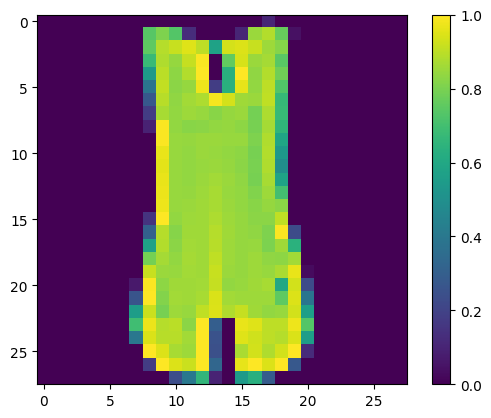

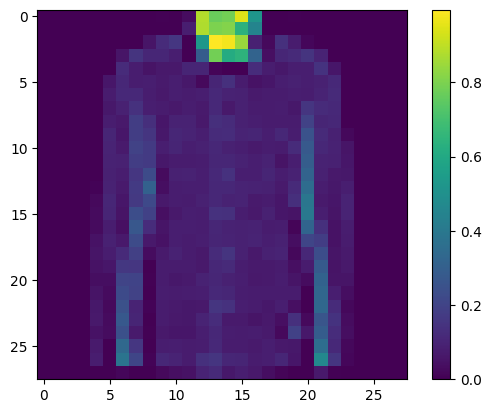

0.0


In [9]:
this_pair = 5
show_image(tr_pairs[this_pair][0])
show_image(tr_pairs[this_pair][1])
print(tr_y[this_pair])

In [12]:
def initialize_base_network():
  input = tf.keras.layers.Input(shape=(28, 28), name="base_input")
  x = tf.keras.layers.Flatten(name="flatten_input")(input)
  x = tf.keras.layers.Dense(128, activation="relu", name="first_dense_layer")(x)
  x = tf.keras.layers.Dropout(0.1, name="first_dropout_layer")(x)
  x = tf.keras.layers.Dense(128, activation="relu", name="second_dense_layer")(x)
  x = tf.keras.layers.Dropout(0.1, name="second_dropout_layer")(x)
  x = tf.keras.layers.Dense(128, activation="relu", name="third_dense_layer")(x)
  return tf.keras.Model(inputs=input, outputs=x)

def euclidean_distance(vects):
  x, y = vects
  sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
  return K.sqrt(K.maximum(sum_square, K.epsilon()))

def eucl_dist_output_shape(shapes):
  shape1, shape2 = shapes
  return (shape1[0], 1)

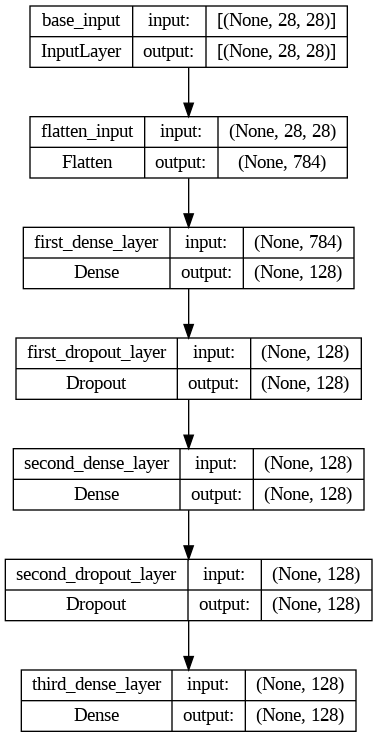

In [16]:
base_network = initialize_base_network()
plot_model(base_network, show_shapes=True)

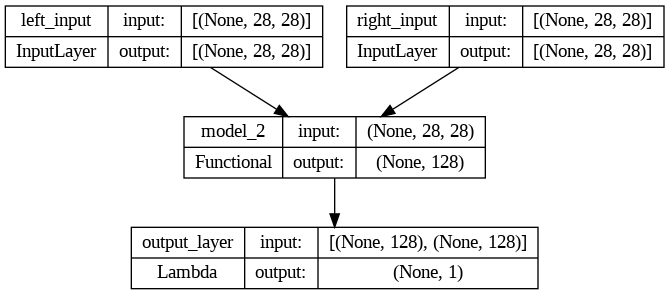

In [18]:
input_a = tf.keras.layers.Input(shape=(28, 28), name="left_input")
vect_output_a = base_network(input_a)
input_b = tf.keras.layers.Input(shape=(28, 28), name="right_input")
vect_output_b = base_network(input_b)

output = tf.keras.layers.Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])
model = tf.keras.Model([input_a, input_b], output)

plot_model(model, show_shapes=True)